### Computational task no.8
Group 1: Danial, Chunmei, Mahmood, Triet

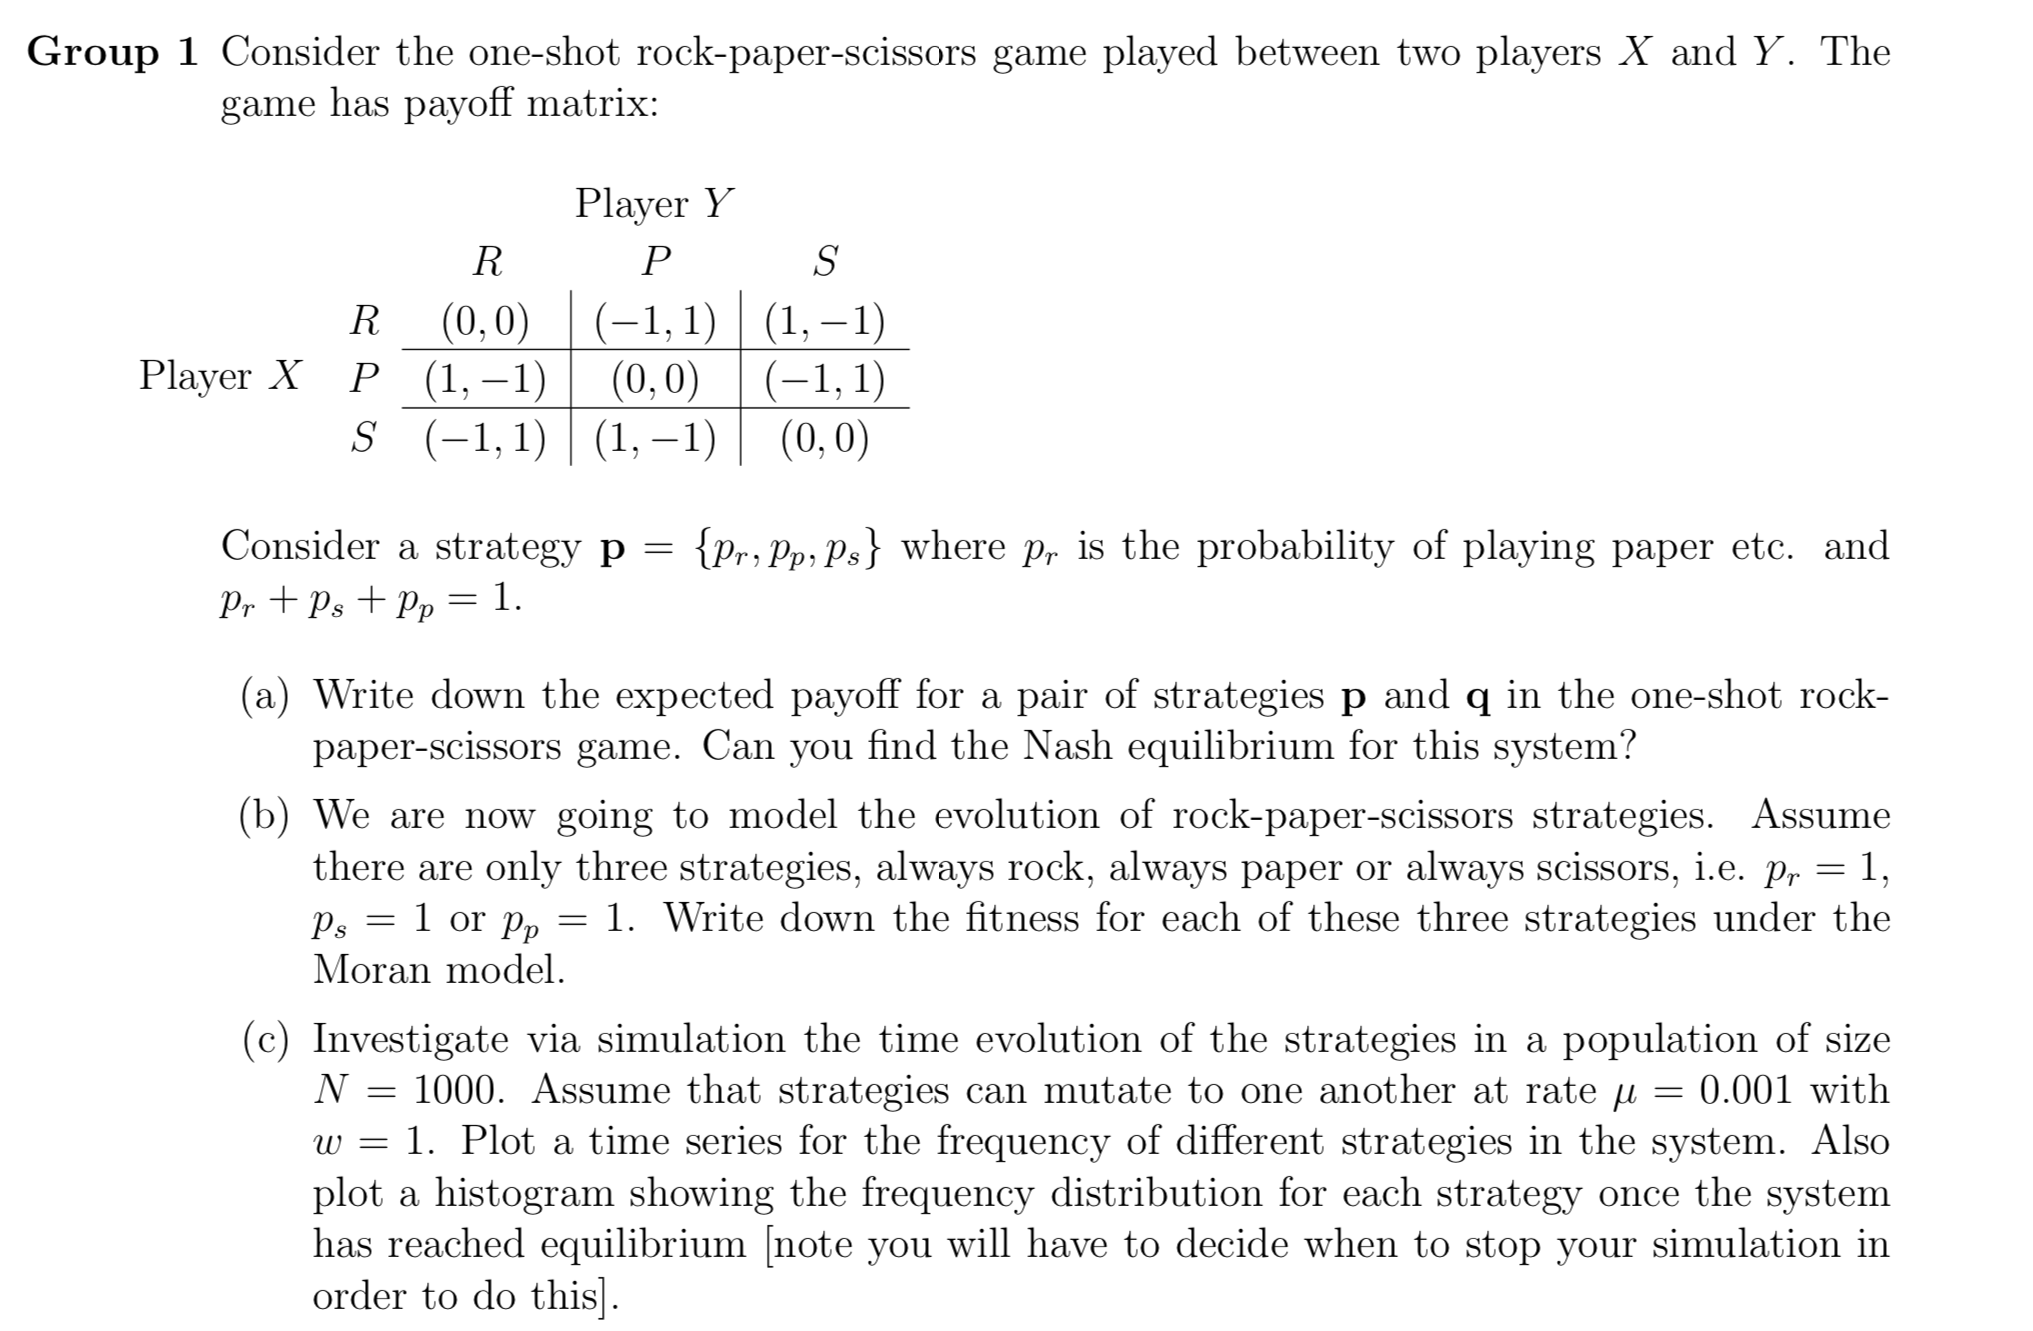

a)
Expected payoff for player x:
$$E_x(R) = q_p(-1) + q_s(+1) + q_R(0)$$
$$E_x(P) = q_p(0)  + q_s(-1) + q_R(+1)$$
$$E_x(S) = q_p(+1) + q_s(0)  + q_R(-1)$$

$$E_x(R) = -q_p + q_s$$
$$E_x(P) = -q_s + q_R$$
$$E_x(S) = q_p  - q_R$$

$$q_R+q_p+q_s = 1$$

Nash equilibrium for player y:
$$q_R = 1/3; q_p = 1/3; q_s = 1/3$$


Expected payoff for player y:
$$E_y(R) = p_p(-1) + p_s(+1) + p_R(0)$$
$$E_y(P) = p_p(0) + p_s(-1) + p_R(+1)$$
$$E_y(S) = p_p(+1) + p_s(0) + p_R(-1)$$

Expected payoff for player y:
$$E_y(R) = -p_p + p_s$$
$$E_y(P) = - p_s + p_R$$
$$E_y(S) = p_p - p_R$$


Nash equilibrium for player x:
$$p_R = 1/3; p_p = 1/3; p_s = 1/3$$

b)


$$\begin{pmatrix} 0 & -1 & +1  \\ +1 & 0 & -1 \\ -1& +1 &0\end{pmatrix}$$

$$i =R, j = P, N-i-j = S$$
<br>
<br>

$$R_{i,j}  = 1-w+w\frac{(i-1)(0)+j(-1)+(N-i-j)(+1)}{N-1}$$

$$P_{i,j}  = 1-w+w\frac{(i)(+1)+(j-1)(0)+(N-i-j)(-1)}{N-1}$$


$$S_{i,j}  = 1-w+w\frac{(i)(-1)+j(+1)+(N-i-j-1)(0)}{N-1}$$

<br>
<br>
<br>
$$R_{i,j}  = 1-w+w\frac{(N-i-2j)}{N-1}$$

$$P_{i,j}  = 1-w+w\frac{-N+2i+j}{N-1}$$


$$S_{i,j}  = 1-w+w\frac{-i+j}{N-1}$$




<br>
<br>
Probability of Birth for Rock:
$$\frac{R_{i,j} i}{R_{i,j} i + P_{i,j} j + S_{i,j} (N-i-j)}$$
<br>
Probability of Birth for Paper:
$$\frac{P_{i,j} j}{R_{i,j} i + P_{i,j} j + S_{i,j} (N-i-j)}$$
<br>
Probability of Birth for Scissors:
$$\frac{S_{i,j} (N-i-j)}{R_{i,j} i + P_{i,j} j + S_{i,j} (N-i-j)}$$

In [415]:
import numpy as np
import matplotlib.pyplot as plt 
import math
import random
from numba import jit
import numba as nb
from numba import jit
import numba as nb
events = [
(+1,-1,0),
(+1,0,-1),
(-1,+1,0),
(0,+1,-1),
(-1,0,+1),
(0,-1,+1)]

events = np.asarray(events)
no_events = np.arange(0,6,1)

@jit(nopython=True)
def Gillespie(size,maxtime,i0,j0,mu):
    ns   = 0
    time = 0
    N    = 900
    t    = np.zeros(size)
    v1   = np.zeros((size, 3))
    #v1 => columns = R,P,S
    #v1[(ns, 0)] = i Rock
    #v1[(ns, 1)] = j Paper
    #v1[(ns, 2)] = N-i-j Scissors 
    
    #ns = 0 ==> initial conditions
    v1[(0, 0)] =i0
    v1[(0, 1)] =j0
    v1[(0, 2)] =N-i0-j0
    w = 0.99

    while time <= maxtime:
        #fitness of Rock paper and scissors:
        wR = 1-w+(w*((N-2*v1[(ns, 1)]-v1[(ns, 0)])/(N-1)))
        wP = 1-w+(w*((-N+(2*v1[(ns, 0)])+v1[(ns, 1)])/(N-1)))
        wS = 1-w+(w*((-v1[(ns, 0)]+v1[(ns, 1)])/(N-1)))
        #Relative fitness of Rock paper and scissors:
        #R_rel = (fitness of R* number of R) / (sum(fitness_z*z))
        R_rel = (wR*v1[(ns, 0)])/(wR*v1[(ns, 0)]+wP*v1[(ns, 1)]+wS*v1[(ns, 2)])
        P_rel = (wP*v1[(ns, 1)])/(wR*v1[(ns, 0)]+wP*v1[(ns, 1)]+wS*v1[(ns, 2)])
        S_rel = (wS*v1[(ns, 2)])/(wR*v1[(ns, 0)]+wP*v1[(ns, 1)]+wS*v1[(ns, 2)])

        
        #Propensities:
        rates = np.array([(R_rel*(v1[(ns, 0)]/N)*(1-mu)+P_rel*(v1[(ns, 1)]/N)*mu +S_rel*(v1[(ns, 2)]/N)*mu)*(v1[(ns, 1)]/N),
                          (R_rel*(v1[(ns, 0)]/N)*(1-mu)+P_rel*(v1[(ns, 1)]/N)*mu +S_rel*(v1[(ns, 2)]/N)*mu)*(v1[(ns, 2)]/N),
                          (P_rel*(v1[(ns, 1)]/N)*(1-mu)+R_rel*(v1[(ns, 0)]/N)*mu +S_rel*(v1[(ns, 2)]/N)*mu)*(v1[(ns, 0)]/N),
                          (P_rel*(v1[(ns, 1)]/N)*(1-mu)+R_rel*(v1[(ns, 0)]/N)*mu +S_rel*(v1[(ns, 2)]/N)*mu)*(v1[(ns, 2)]/N),
                          (S_rel*(v1[(ns, 2)]/N)*(1-mu)+R_rel*(v1[(ns, 0)]/N)*mu +P_rel*(v1[(ns, 1)]/N)*mu)*(v1[(ns, 0)]/N),
                          (S_rel*(v1[(ns, 2)]/N)*(1-mu)+R_rel*(v1[(ns, 0)]/N)*mu +P_rel*(v1[(ns, 1)]/N)*mu)*(v1[(ns, 1)]/N)])
                         
    
    
    
           
        total_rate  =  np.sum(rates)
        dt = -math.log(1 - random.uniform(0.0, 1.0)) / total_rate
        choose = np.searchsorted(np.cumsum(rates/total_rate), np.random.rand(1))[0]

        v1[ns+1]= v1[ns]+events[choose]
            
        time   = time+dt
        t[ns+1]= t[ns]+dt
        ns= ns+1
        if ns == size-1:
            break
 
 

        

    return t[0:ns], v1[0:ns]


In [422]:
t,v1 = Gillespie(size=100000,maxtime=100000,i0=300,j0=300,mu=0.001)

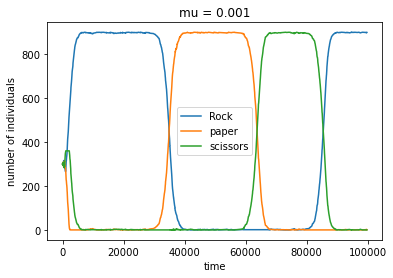

In [423]:
plt.plot(t,v1[:,[0]])
plt.plot(t,v1[:,[1]])
plt.plot(t,v1[:,[2]])
plt.legend(['Rock', 'paper','scissors']);
plt.title('mu = 0.001');
plt.xlabel('time')
plt.ylabel('number of individuals');

In [424]:
t,v1 = Gillespie(size=100000,maxtime=500000,i0=300,j0=300,mu=0.001)

In [425]:
R_stationary = v1[:,[0]][round(len(t)/5):len(t)-1]
P_stationary = v1[:,[1]][round(len(t)/5):len(t)-1]
S_stationary = v1[:,[2]][round(len(t)/5):len(t)-1]

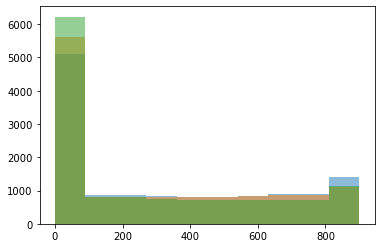

In [426]:
plt.hist(R_stationary, alpha = 0.5);
plt.hist(P_stationary, alpha = 0.5);
plt.hist(S_stationary, alpha = 0.5);